<a href="https://colab.research.google.com/github/imanaqeel/Image-classifier-project/blob/main/COVID_19_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COVID-19 Classifier Model, based on : https://www.youtube.com/watch?v=nHQDDAAzIsI&feature=youtu.be 


The heatmap generated shows high value of False Positives, and False Negatives, compared to the results obatined in the tutorial.
This maybe due to a decreased no of 'steps_per_epochs' used from 8 to 5.

In [ ]:
#Dataset : http://cb.lk/covid_19

!wget http://cb.lk/covid_19


--2021-02-28 18:04:26--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 159.89.170.74
Connecting to cb.lk (cb.lk)|159.89.170.74|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2021-02-28 18:04:27--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|159.89.170.74|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2021-02-28 18:04:27--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.18, 2620:100:6032:18::a27d:5212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2021-02-28 18:04:28--  https://www.dropbox.com/s/ra

In [ ]:
  !unzip covid_19

Archive:  covid_19
replace CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
import 

In [ ]:
 #CNN Based model in keras
 #its gng to be a layer based type layered architecture
 #helpful bcoz ???
 #will build multiple cnn layers and then classification layers
 #32 feature extract, ie will extract 32 diff type of filters in 1st layer
 #less no of filter in lower layers as they can detect less no of features
 #as u go deeper in n/w receptive filed increases, features it extracts gets large no of...
#kernel size in 3x3 ie standard choice

model = Sequential()
 
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu')) #adding 64 filters each of size 3x3
model.add(MaxPooling2D(pool_size=(2,2))) #default size is 2,2

model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid')) 

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam', metrics=['accuracy'])







# New Section

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 54, 54, 64)       

In [ ]:
#train frm scratch

#adam is default choice
#matrix is accuracy, ie we will do grad des optimization 4 adam, matrix on which we optimize model is gng 32 b class fic
#DEEPER INTO MODEL NEED 2 INCRS NO OF CHANNELS, will find more complexfeatures in the object frm distance?
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,

)
test_dataset = image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224), #224 standard size, image net samples also based on this
    batch_size = 32,
    class_mode = 'binary') 


Found 224 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
#i/p shape saying what size we will feed in u
#bt then trget size is for shaping in2 trgt size


#similar for validation genr.
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224), 
    batch_size = 32,
    class_mode = 'binary')


Found 60 images belonging to 2 classes.


In [ ]:
#how to find label for final img- auto, 80-20 split btwn val & train

#far conversion- normalization

hist = model.fit(
    train_generator,
    steps_per_epoch=5,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2
)
#trainin now starting



Epoch 1/10
5/5 [==============================] - 47s 9s/step - loss: 2.2084 - accuracy: 0.5312 - val_loss: 0.6718 - val_accuracy: 0.8333
Epoch 2/10
5/5 [==============================] - 45s 9s/step - loss: 0.6469 - accuracy: 0.6313 - val_loss: 0.6785 - val_accuracy: 0.5000
Epoch 3/10
5/5 [==============================] - 47s 9s/step - loss: 0.5841 - accuracy: 0.7312 - val_loss: 0.5632 - val_accuracy: 0.9000
Epoch 4/10
5/5 [==============================] - 47s 9s/step - loss: 0.4836 - accuracy: 0.7875 - val_loss: 0.3779 - val_accuracy: 0.9167
Epoch 5/10
5/5 [==============================] - 45s 9s/step - loss: 0.3786 - accuracy: 0.8562 - val_loss: 0.3603 - val_accuracy: 0.9167
Epoch 6/10
5/5 [==============================] - 45s 9s/step - loss: 0.3767 - accuracy: 0.8562 - val_loss: 0.3727 - val_accuracy: 0.8667
Epoch 7/10
5/5 [==============================] - 44s 9s/step - loss: 0.3229 - accuracy: 0.8813 - val_loss: 0.2448 - val_accuracy: 0.9667
Epoch 8/10
5/5 [==================

In [ ]:
#grad map technique , class activation mapping, 

In [ ]:
#Confusion matrix: gives u prediction vs normal tl=h br=h rest=0

In [ ]:
model.save("model_adv.h5")

In [ ]:
model.evaluate(train_generator)

7/7 [==============================] - 18s 3s/step - loss: 0.1266 - accuracy: 0.9688


[0.12663152813911438, 0.96875]

In [ ]:
model.evaluate(validation_generator)

2/2 [==============================] - 2s 885ms/step - loss: 0.0995 - accuracy: 0.9833


[0.09954384714365005, 0.9833333492279053]

In [ ]:
#above indicating low loss

In [ ]:
model = load_model('model_adv.h5')

In [ ]:
import os

In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
y_actual = []
y_test = []

In [ ]:
for i in os.listdir("./CovidDataset/Val/Normal/"):
  img = image.load_img('./CovidDataset/Val/Normal/'+i, target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = (model.predict(img) > 0.5).astype(int)
  y_test.append(p[0,0])
  y_actual.append(1)


In [ ]:
print(p)

[[1]]


In [ ]:
for i in os.listdir("./CovidDataset/Val/Covid/"):
  img = image.load_img('./CovidDataset/Val/Covid/'+i, target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = (model.predict(img) > 0.5).astype(int)
  y_test.append(p[0,0])
  y_actual.append(0)


In [ ]:
print(p)

In [ ]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_actual, y_test)

In [ ]:
import seaborn as sns

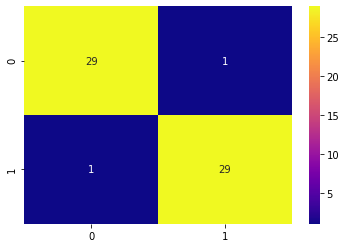

In [ ]:
sns.heatmap(cm, cmap="plasma", annot=True)